# Stori Data Science Challenge

Thank you for your interest in Stori. We estimate that this Data Challenge can take up to 2 business days to solve and submit results, if you have questions about the challenge don't hesitate to contact us and we will be happy to help you.

At Stori, you'll always be working with a diverse team, often including business analysts, engineers, product managers, and senior leaders. The ability to not just complete data science work, but also to explain and present your work is important. With that in mind, please deliver your answers as if you were handing off work to another data scientist joining your team. Tying together your intent, code, analysis and results with visualizations is the goal.

While we recognize sharing code is a common practice in the open source community, we ask that you refrain from sharing any part of this interview submission publicly to ensure a fair and equal interview process for all. We also ask that any code written by others is cited appropriately.


### Challenge

For this challenge we will use a fake credit card dataset that is attached as df.csv, which includes information from a public Kaggle dataset with three added fields: activated_date, last_payment_date and fraud.

**Question 1**

    1.1 Plot an histogram of the balance amount for all the customers.
    1.2 Report any structure you find and any hypotheses you have about that structure.
    1.3 Report mean and median balance, grouped by year and month of activated_date.

**Question 2**

    2.1 Report in a table the following information for customers who activated their account and made their last payment during 2020: cust_id (excluding letters), activated_date (in format YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance, credit_limit, and a calculated field of cash_advance as a percentage of credit_limit.

**Question 3**

    3.1 Build a predictive model for fraud.
    3.2 What explanatory variable was the most powerful predictor for fraud?

We appreciate it if you include explanations of your intent, methods, conclusions and any assumptions. Please reply with the source code used to answer these questions in a clear and well-documented manner. If you attempted methods that didn't work or had ideas that could not be implemented, also include them in the final results.

Good luck!

# Import libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re

from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import tensorflow as tf

sns.set()
%matplotlib inline

In [2]:
#Import the dataset
data = pd.read_csv("Stori Data Challenge 2021 ( (1) (1).csv")

In [3]:
data.head(10)

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.40,0.000000,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.00,0.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.00,0.000000,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,6,C10006,2019-10-06,2020-07-27,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,...,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,7,C10007,2019-10-06,2020-10-30,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,...,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
7,8,C10008,2019-10-06,2020-08-06,1823.652743,1.000000,436.20,0.00,436.20,0.000000,...,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,9,C10009,2019-10-06,2020-10-06,1014.926473,1.000000,861.49,661.49,200.00,NaN,...,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0
9,10,C10010,2019-10-06,2020-05-06,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,...,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0


In [4]:
data.tail()

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
8945,8946,C19186,2020-07-31,2020-11-03,28.493517,1.000000,291.12,0.00,291.12,0.000000,...,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,0
8946,8947,C19187,2020-07-31,2020-09-06,19.183215,1.000000,300.00,0.00,300.00,0.000000,...,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6,0
8947,8948,C19188,2020-07-31,2020-06-03,23.398673,0.833333,144.40,0.00,144.40,0.000000,...,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,0
8948,8949,C19189,2020-07-31,2020-07-19,13.457564,0.833333,0.00,0.00,0.00,36.558778,...,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0
8949,8950,C19190,2020-07-31,2020-10-14,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,...,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,0


In [5]:
data.shape

(8950, 22)

Unnamed column is just an identification, so we can take it out of the dataset.

In [6]:
data= data.drop("Unnamed: 0", axis=1)

In [7]:
total_cols = data.columns.values.tolist()
total_cols

['cust_id',
 'activated_date',
 'last_payment_date',
 'balance',
 'balance_frequency',
 'purchases',
 'oneoff_purchases',
 'installments_purchases',
 'cash_advance',
 'purchases_frequency',
 'oneoff_purchases_frequency',
 'purchases_installments_frequency',
 'cash_advance_frequency',
 'cash_advance_trx',
 'purchases_trx',
 'credit_limit',
 'payments',
 'minimum_payments',
 'prc_full_payment',
 'tenure',
 'fraud']

In [8]:
columns= total_cols[3:-1]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   activated_date                    8937 non-null   object 
 2   last_payment_date                 8941 non-null   object 
 3   balance                           8948 non-null   float64
 4   balance_frequency                 8950 non-null   float64
 5   purchases                         8950 non-null   float64
 6   oneoff_purchases                  8950 non-null   float64
 7   installments_purchases            8950 non-null   float64
 8   cash_advance                      8838 non-null   float64
 9   purchases_frequency               8950 non-null   float64
 10  oneoff_purchases_frequency        8950 non-null   float64
 11  purchases_installments_frequency  8950 non-null   float64
 12  cash_a

### Columns explanation:

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

In [10]:
#Statistical summary:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
balance,8948.0,1564.612804,2081.735635,0.000000,128.234272,873.385231,2054.525476,19043.13856
balance_frequency,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
purchases,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
oneoff_purchases,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
installments_purchases,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
cash_advance,8838.0,978.980630,2099.762588,0.000000,0.000000,0.000000,1115.395002,47137.21176
purchases_frequency,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
oneoff_purchases_frequency,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
purchases_installments_frequency,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
cash_advance_frequency,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


We can see:

- The average balance handled by the clients is 1,564.47.
- The average of the update of the balance frequency is 0.9 (it is updated very often).
- The average of purchases made is 1,003
- The frequency of purchases is 0.5
- The average of ONE_OFFPURCHASE_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY and CASH_ADVANCED_FREQUENCY is very low.
- Average credit limit is nearly 4,500
- The percentage of the full payment is 15%
- Customers have been with the bank for an average of 11.5 years.

- We can also see that there are many columns with minimums and with 25% of the data in 0 

### Data visualization 

Let's see how balanced is the dataset:

In [11]:
#para visualizar los datos de la columna stars:
fraud_col = data.groupby("fraud", sort= False, as_index=False).size().sort_values(by="size", ascending= False)
fraud_col

,fraud,size
0,0,8880
1,1,70


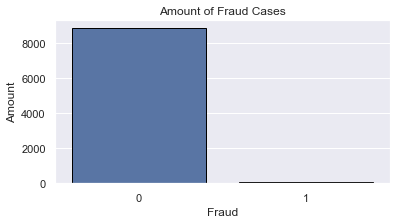

In [12]:
#Graphic
plt.figure(figsize=(6,3))

sns.barplot(data = fraud_col, x="fraud", y= "size", lw=1, edgecolor="black")

plt.xlabel("Fraud")
plt.ylabel("Amount")
plt.title("Amount of Fraud Cases")
plt.show()

We can see the dataset is not balanced.

**Missing data:**

In [13]:
data.isnull().sum()

cust_id                               0
activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64

<AxesSubplot:>

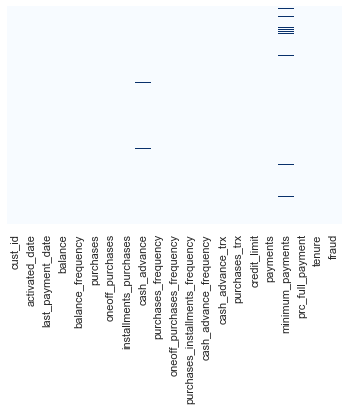

In [14]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="Blues")

Data can be imputed by KNNImputer that gives the the value of of the 3 nearest values.

In [15]:
imputation = KNNImputer(n_neighbors=3)

In [16]:
data_imp = data.drop(["cust_id", "activated_date", "last_payment_date"], axis=1)

In [17]:
data_imp = imputation.fit_transform(data_imp)

In [18]:
data_imp = pd.DataFrame(data_imp,
                     columns = ['balance',
                                 'balance_frequency',
                                 'purchases',
                                 'oneoff_purchases',
                                 'installments_purchases',
                                 'cash_advance',
                                 'purchases_frequency',
                                 'oneoff_purchases_frequency',
                                 'purchases_installments_frequency',
                                 'cash_advance_frequency',
                                 'cash_advance_trx',
                                 'purchases_trx',
                                 'credit_limit',
                                 'payments',
                                 'minimum_payments',
                                 'prc_full_payment',
                                 'tenure',
                                 'fraud'])

In [19]:
data_imp.head(10)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,448.208854,0.000000,12.0,0.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,0.0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,64.0,13500.0,6354.314328,198.065894,1.000000,12.0,0.0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.000000,12.0,0.0
8,1014.926473,1.000000,861.49,661.49,200.00,638.827689,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12.0,0.0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.000000,12.0,0.0


In [20]:
data_imp.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
fraud                               0
dtype: int64

In [21]:
#Returning the imputed columns to the original dataset
data["balance"] = np.where(data["balance"], data_imp["balance"], data_imp["balance"])
data["cash_advance"] = np.where(data["cash_advance"], data_imp["cash_advance"], data_imp["cash_advance"])
data["credit_limit"] = np.where(data["credit_limit"], data_imp["credit_limit"], data_imp["credit_limit"])
data["minimum_payments"] = np.where(data["minimum_payments"], data_imp["minimum_payments"], data_imp["minimum_payments"])

In [22]:
data.isnull().sum()

cust_id                              0
activated_date                      13
last_payment_date                    9
balance                              0
balance_frequency                    0
purchases                            0
oneoff_purchases                     0
installments_purchases               0
cash_advance                         0
purchases_frequency                  0
oneoff_purchases_frequency           0
purchases_installments_frequency     0
cash_advance_frequency               0
cash_advance_trx                     0
purchases_trx                        0
credit_limit                         0
payments                             0
minimum_payments                     0
prc_full_payment                     0
tenure                               0
fraud                                0
dtype: int64

In [23]:
ad_data= data[data.activated_date.isnull()==True]
ad_data

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
1253,C11297,NaN,2020-06-16,75.039332,0.272727,588.05,588.05,0.00,0.000000,0.166667,...,0.000000,0.000000,0,5,9000.0,707.386471,18.113017,0.000000,12,0
1765,C11825,NaN,2020-09-21,1377.812538,1.000000,14300.98,10394.67,3906.31,0.000000,1.000000,...,0.916667,0.000000,0,55,18000.0,13535.676970,352.090849,1.000000,12,0
1840,C11901,NaN,2020-11-08,1216.594927,1.000000,878.64,757.80,120.84,155.804123,0.750000,...,0.166667,0.166667,2,20,1200.0,654.244280,1296.173027,0.000000,12,0
2879,C12963,NaN,2020-09-02,967.177679,1.000000,208.40,0.00,208.40,0.000000,0.333333,...,0.333333,0.000000,0,4,1000.0,431.402414,846.724721,0.000000,12,0
3664,C13768,NaN,2020-04-26,1184.529629,1.000000,467.32,0.00,467.32,2337.837011,1.000000,...,1.000000,0.583333,7,25,6500.0,903.639776,340.000899,0.083333,12,0
4023,C14137,NaN,2020-10-29,73.876478,1.000000,600.00,0.00,600.00,0.000000,0.666667,...,0.666667,0.000000,0,12,3000.0,574.321262,165.586015,1.000000,12,0
4486,C14611,NaN,2020-05-12,1248.903628,1.000000,518.31,113.31,405.00,472.118676,1.000000,...,1.000000,0.250000,5,29,1200.0,1141.190295,980.845115,0.000000,12,0
4634,C14760,NaN,2020-07-15,268.966315,0.727273,784.00,659.00,125.00,0.000000,0.500000,...,0.333333,0.000000,0,12,10500.0,514.650308,159.173080,0.166667,12,0
5422,C15575,NaN,2020-09-17,6958.239974,1.000000,0.00,0.00,0.00,3482.699506,0.000000,...,0.000000,0.166667,2,0,7500.0,3688.217452,1752.657115,0.000000,12,0
5533,C15689,NaN,2020-06-24,30.395073,1.000000,512.47,512.47,0.00,0.000000,1.000000,...,0.000000,0.000000,0,12,7000.0,484.669932,192.908611,1.000000,12,0


In [24]:
lp_data= data[data.last_payment_date.isnull()==True]
lp_data

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
804,C10833,2019-10-31,NaN,81.762162,0.909091,777.04,521.46,255.58,0.000000,0.833333,...,0.750000,0.000000,0,20,7500.0,753.811533,162.763716,0.000000,12,0
2484,C12558,2019-12-26,NaN,102.751154,1.000000,1063.69,0.00,1063.69,0.000000,1.000000,...,1.000000,0.000000,0,29,7000.0,1928.089519,164.687639,0.454545,12,0
3000,C13089,2020-01-13,NaN,2380.291402,1.000000,1433.20,487.74,945.46,254.450638,0.666667,...,0.583333,0.166667,3,33,7000.0,1877.023036,616.430163,0.000000,12,0
5144,C15289,2020-03-26,NaN,1804.401706,1.000000,40.00,40.00,0.00,2392.281584,0.083333,...,0.000000,0.250000,6,1,2500.0,2459.382382,679.004285,0.000000,12,0
5684,C15842,2020-04-13,NaN,1422.304200,1.000000,0.00,0.00,0.00,115.324837,0.000000,...,0.000000,0.083333,1,0,3000.0,3489.163639,5873.275911,0.083333,12,0
6394,C16569,2020-05-08,NaN,603.686346,1.000000,397.50,88.00,309.50,63.384239,0.500000,...,0.416667,0.166667,2,12,1500.0,279.038144,269.861111,0.000000,12,0
7195,C17390,2020-06-03,NaN,2283.366217,1.000000,2734.77,1645.87,1088.90,4303.863961,0.833333,...,0.500000,0.750000,23,24,9500.0,8122.574527,512.099872,0.083333,12,0
7493,C17696,2020-06-12,NaN,74.430900,1.000000,45.65,45.65,0.00,0.000000,0.083333,...,0.000000,0.000000,0,1,2500.0,0.000000,157.114631,0.000000,12,0
8649,C18885,2020-07-21,NaN,543.219992,0.833333,0.00,0.00,0.00,610.515323,0.000000,...,0.000000,0.833333,8,0,3000.0,407.343532,99.150338,0.250000,6,0


We could delete missing data from `activated_date` and	`last_payment_date`.

In [25]:
data= data.dropna(axis=0)

In [26]:
data.isnull().sum()

cust_id                             0
activated_date                      0
last_payment_date                   0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
fraud                               0
dtype: int64

In [27]:
data.shape

(8928, 21)

**Duplicated data:**

In [28]:
data.duplicated().sum()

0

There are not duplicated data.

### Question 1

**1.1 Plot an histogram of the balance amount for all the customers.**

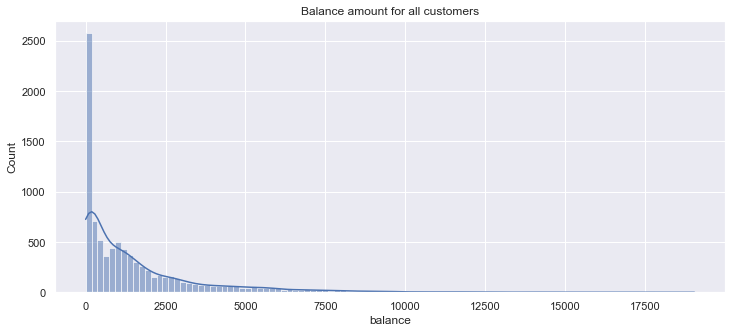

In [29]:
plt.figure(figsize= (12,5))
sns.histplot(data.balance, kde=True)
plt.title ("Balance amount for all customers")
plt.show()

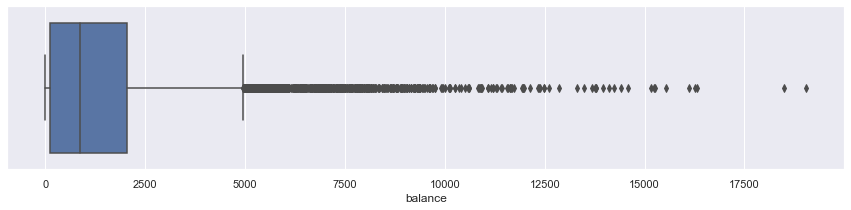

In [30]:
#Boxplot of Balance
plt.figure(figsize= (15,3))
sns.boxplot(x=data.balance)
plt.show()

In [31]:
data.balance.describe()

count     8928.000000
mean      1565.551937
std       2082.726492
min          0.000000
25%        128.372855
50%        873.385231
75%       2057.408524
max      19043.138560
Name: balance, dtype: float64

**1.2 Report any structure you find and any hypotheses you have about that structure.**

We can see that most of the customers are between 0 and less than 2,500 (less than 75% have less than 2,057.41), but also there are 2 customers who have more than 17,500.

We could see customer's balance is not high in the bank.

**Hypotheses: XXXXXXXXXXX**

**1.3 Report mean and median balance, grouped by year and month of activated_date.**

In [32]:
activated_date_data = data[["activated_date", "balance"]]
activated_date_data= activated_date_data.copy()

In [33]:
activated_date_data

,activated_date,balance
0,2019-10-06,40.900749
1,2019-10-06,3202.467416
2,2019-10-06,2495.148862
3,2019-10-06,1666.670542
4,2019-10-06,817.714335
...,...,...
8945,2020-07-31,28.493517
8946,2020-07-31,19.183215
8947,2020-07-31,23.398673
8948,2020-07-31,13.457564


In [34]:
activated_date_data["year"]= pd.to_datetime(activated_date_data["activated_date"], format="%Y/%m/%d").dt.year
activated_date_data["month"]= pd.to_datetime(activated_date_data["activated_date"], format="%Y/%m/%d").dt.month

In [35]:
activated_date_data

,activated_date,balance,year,month
0,2019-10-06,40.900749,2019,10
1,2019-10-06,3202.467416,2019,10
2,2019-10-06,2495.148862,2019,10
3,2019-10-06,1666.670542,2019,10
4,2019-10-06,817.714335,2019,10
...,...,...,...,...
8945,2020-07-31,28.493517,2020,7
8946,2020-07-31,19.183215,2020,7
8947,2020-07-31,23.398673,2020,7
8948,2020-07-31,13.457564,2020,7


In [36]:
activate_date_mean= activated_date_data.groupby(["year", "month"]).mean("balance")
activate_date_mean

balance
year month             
2019 10     2485.205048
     11     1848.704323
     12     2020.152357
2020 1      1852.212152
     2      1747.350977
     3      1554.703952
     4      1483.252293
     5      1214.989637
     6       939.450059
     7       649.830677

In [37]:
activate_date_mean= activated_date_data.groupby(["year", "month"]).median("balance")
activate_date_mean

balance
year month             
2019 10     1525.458146
     11     1082.071173
     12     1167.182039
2020 1      1173.662921
     2       994.841733
     3       827.393597
     4       907.371097
     5       734.777480
     6       472.791862
     7       221.203759

We can see that as time passes (from January to July 2020) both the mean and the median of the balance decreases. Same from October to December 2019.

### Question 2

    2.1 Report in a table the following information for customers who activated their account and made their last payment during 2020: cust_id (excluding letters), activated_date (in format YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance, credit_limit, and a calculated field of cash_advance as a percentage of credit_limit.

In [38]:
#Making the table
question2= data[["cust_id","last_payment_date","activated_date","cash_advance", "credit_limit"]]
question2= question2.copy()

In [39]:
question2.head()

,cust_id,last_payment_date,activated_date,cash_advance,credit_limit
0,C10001,2020-09-09,2019-10-06,0.000000,1000.0
1,C10002,2020-07-04,2019-10-06,6442.945483,7000.0
2,C10003,2020-09-17,2019-10-06,0.000000,7500.0
3,C10004,2020-08-24,2019-10-06,205.788017,7500.0
4,C10005,2020-10-20,2019-10-06,0.000000,1200.0


In [40]:
#Giving requested format:
question2["last_payment_date"]= pd.to_datetime(question2["last_payment_date"], format="%Y/%m/%d")
question2["activated_date"]= pd.to_datetime(question2["activated_date"], format="%Y/%m")
question2["cash_advance_pct_credit_limit"]= (question2.cash_advance/question2.credit_limit)*100

In [41]:
question2.head()

,cust_id,last_payment_date,activated_date,cash_advance,credit_limit,cash_advance_pct_credit_limit
0,C10001,2020-09-09,2019-10-06,0.000000,1000.0,0.000000
1,C10002,2020-07-04,2019-10-06,6442.945483,7000.0,92.042078
2,C10003,2020-09-17,2019-10-06,0.000000,7500.0,0.000000
3,C10004,2020-08-24,2019-10-06,205.788017,7500.0,2.743840
4,C10005,2020-10-20,2019-10-06,0.000000,1200.0,0.000000


In [42]:
def leaveNumbers(txt):
    return "".join(c for c in txt if c.isdigit())

In [43]:
question2["cust_id"]= question2["cust_id"].map(leaveNumbers)
question2.head()

,cust_id,last_payment_date,activated_date,cash_advance,credit_limit,cash_advance_pct_credit_limit
0,10001,2020-09-09,2019-10-06,0.000000,1000.0,0.000000
1,10002,2020-07-04,2019-10-06,6442.945483,7000.0,92.042078
2,10003,2020-09-17,2019-10-06,0.000000,7500.0,0.000000
3,10004,2020-08-24,2019-10-06,205.788017,7500.0,2.743840
4,10005,2020-10-20,2019-10-06,0.000000,1200.0,0.000000


### Question 3

    3.1 Build a predictive model for fraud.
    
**Data split**

In [44]:
X= data.drop(["cust_id", "last_payment_date", "activated_date", "fraud"], axis=1)
y= data.fraud

In [45]:
X.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,448.208854,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64

In [47]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size=0.8, stratify=y)

In [48]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1785, 17) (1785,)
(7143, 17) (7143,)


**Data scaler**

In [49]:
scaler= StandardScaler()

In [50]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

**Metrics**

* **Visualizations:** Confusion Matrix (from sklearn.metrics import confusion_matrix).
* **F1 score:** (from sklearn.metrics import classification_report)
    * **F1_score:** The F1 score summarizes the precision and sensitivity in a single metric. For this reason, it is very useful when the distribution of classes is unbalanced.
    * **Recall:** It is the proportion of positive cases that were correctly identified by the algorithm.
    * Criterion: highest F1_score & highest Recall in class 1.
   

In [51]:
def results (y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, cbar= False,  square= True, annot=True, fmt= '.0f', annot_kws={'size': 15},
           cmap= 'coolwarm', linewidths=.5);
    plt.title("Confusion matrix")
    plt.ylabel('Predicted class')
    plt.xlabel('True class')
    plt.show()
    print (classification_report(y_test, y_pred))

### Logistic Regresion:

In [52]:
lr = LogisticRegression(random_state=42, class_weight="balanced")
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [53]:
y_pred_lr= lr.predict(X_test)

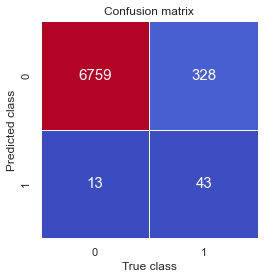

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      7087
           1       0.12      0.77      0.20        56

    accuracy                           0.95      7143
   macro avg       0.56      0.86      0.59      7143
weighted avg       0.99      0.95      0.97      7143



In [54]:
results (y_test, y_pred_lr)

## NaÏve Bayes

In [55]:
nb= GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [56]:
y_pred_nb= nb.predict(X_test)

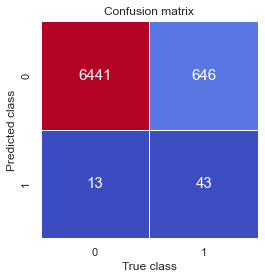

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      7087
           1       0.06      0.77      0.12        56

    accuracy                           0.91      7143
   macro avg       0.53      0.84      0.53      7143
weighted avg       0.99      0.91      0.94      7143



In [57]:
results(y_test, y_pred_nb)

## Linear SVC

In [58]:
svc= LinearSVC()
svc.fit(X_train, y_train)

/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [59]:
y_pred_svc= svc.predict(X_test)

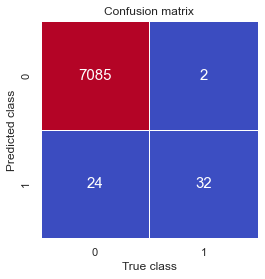

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7087
           1       0.94      0.57      0.71        56

    accuracy                           1.00      7143
   macro avg       0.97      0.79      0.85      7143
weighted avg       1.00      1.00      1.00      7143



In [60]:
results (y_test, y_pred_svc)

## Random Forest

In [61]:
rf= RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
y_pred_rf= rf.predict(X_test)

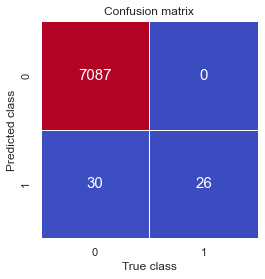

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7087
           1       1.00      0.46      0.63        56

    accuracy                           1.00      7143
   macro avg       1.00      0.73      0.82      7143
weighted avg       1.00      1.00      1.00      7143



In [63]:
results(y_test, y_pred_rf)

## Deep Learning (neuronal network)

In [64]:
dl = tf.keras.models.Sequential()
dl.add(tf.keras.layers.Dense(units= 500, activation="relu", input_shape=(17, )))
dl.add(tf.keras.layers.Dense(units= 500, activation="relu"))
dl.add(tf.keras.layers.Dense(units= 500, activation="relu"))
dl.add(tf.keras.layers.Dense(units= 1, activation="sigmoid"))

In [65]:
dl.compile(optimizer="Adam", loss= "binary_crossentropy", metrics=["accuracy"])

In [66]:
dl.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
36/36 [==============================] - 1s 2ms/step - loss: 0.2199 - accuracy: 0.9229
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9909
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9978
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9904
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 0.9959
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9973
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9991
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.9993
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9973
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 0.9979
Epoch 11/

36/36 [==============================] - 0s 3ms/step - loss: 9.9070e-07 - accuracy: 1.0000
Epoch 81/100
36/36 [==============================] - 0s 3ms/step - loss: 1.0600e-06 - accuracy: 1.0000
Epoch 82/100
36/36 [==============================] - 0s 3ms/step - loss: 9.3271e-07 - accuracy: 1.0000
Epoch 83/100
36/36 [==============================] - 0s 3ms/step - loss: 7.7571e-07 - accuracy: 1.0000
Epoch 84/100
36/36 [==============================] - 0s 3ms/step - loss: 8.5514e-07 - accuracy: 1.0000
Epoch 85/100
36/36 [==============================] - 0s 3ms/step - loss: 8.2565e-07 - accuracy: 1.0000
Epoch 86/100
36/36 [==============================] - 0s 3ms/step - loss: 1.3106e-06 - accuracy: 1.0000
Epoch 87/100
36/36 [==============================] - 0s 3ms/step - loss: 8.8888e-07 - accuracy: 1.0000
Epoch 88/100
36/36 [==============================] - 0s 3ms/step - loss: 7.0583e-07 - accuracy: 1.0000
Epoch 89/100
36/36 [==============================] - 0s 3ms/step - loss: 1.0

In [67]:
y_pred_dl= dl.predict(X_test)

In [68]:
y_pred_dl = (y_pred_dl>0.5)

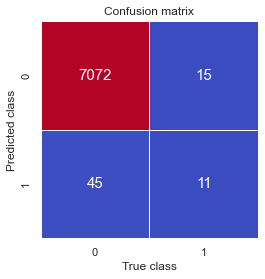

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7087
           1       0.42      0.20      0.27        56

    accuracy                           0.99      7143
   macro avg       0.71      0.60      0.63      7143
weighted avg       0.99      0.99      0.99      7143



In [69]:
results(y_test, y_pred_dl)

### Model Selection:

In [73]:
comparative= pd.DataFrame({
    "Model": ["Logistic Regresion", "Naïve Bayes", "Linear SVC", "Ramndom Forest", "Deep Learning"],
    "Accuracy": [0.95, 0.91, 1.00, 1.00, 0.99],
    "Recall (class 1 -Fraud-)": [0.77, 0.77, 0.57, 0.46, 0.27],
    "Recall (class 0 -No Fraud-)": [0.95, 0.91, 1.00, 1.00, 1.00],
    "FP": [13, 13, 24, 30, 45],
    "FN": [328, 646, 2, 0, 15]
})
comparative

,Model,Accuracy,Recall (class 1 -Fraud-),Recall (class 0 -No Fraud-),FP,FN
0,Logistic Regresion,0.95,0.77,0.95,13,328
1,Naïve Bayes,0.91,0.77,0.91,13,646
2,Linear SVC,1.00,0.57,1.00,24,2
3,Ramndom Forest,1.00,0.46,1.00,30,0
4,Deep Learning,0.99,0.27,1.00,45,15


Comparing, we could see that all models have a good result in accuracy, BUT we are interesting in fraud preventions, so we need to evaluate the recall for class 1:

$$Recall \ (Class \ 1) = \frac{Fraud}{Total \ Fraud \ Cases}$$

A highest Recall in Class 1 means that the classifier predicted (found) more Fraud cases, so it would be the best classifier.

So the best model is **Logistic Regression**. In this case is the highest Recall in class 1 and the highest accuracy (and recall) for class 0.

**3.2 What explanatory variable was the most powerful predictor for fraud?**

In [71]:
weights= lr.coef_
weights

array([[ 0.9001009 ,  1.88717833,  0.76894229,  0.2614124 ,  1.21764742,
         2.01776467,  0.2719608 ,  0.89008844, -2.14048759, -1.76430801,
         0.45431617, -0.28256861, -1.2997769 , -0.30930406,  0.78491162,
        -1.16784207,  0.99549398]])

In [72]:
powerful_vars= pd.DataFrame(list(zip(columns, weights.transpose())), columns = ['Component','Weights']).sort_values(by="Weights",ascending=False)
powerful_vars

,Component,Weights
5,cash_advance,[2.017764670797378]
1,balance_frequency,[1.8871783320696975]
4,installments_purchases,[1.2176474189807074]
16,tenure,[0.9954939797875599]
0,balance,[0.900100896121285]
7,oneoff_purchases_frequency,[0.890088441727506]
14,minimum_payments,[0.7849116241817005]
2,purchases,[0.7689422877439613]
10,cash_advance_trx,[0.4543161671246174]
6,purchases_frequency,[0.2719607971106703]


The three **most powerful variable predictors** for fraud in this case are: 
* cash_advance, 
* balance_frequency,
* installments_purchases